<h1 style="text-align:center;">DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP</h1>

<h2 style="text-align:center;"> THE SPARKS FOUNDATION</h2>

<h3 style="text-align:center;">BY-MRINAL CHANDRA MISHRA</h3>


<h3 style="text-align:center;"> TASK-1 Predict the percentage of an student based on the no. of study hours.</h3>

To solve any data Science problem we have to follow some approach.
1. Frame the Problem
2. Collect Data
3. EDA
4. Model Creation
5. Analyse performance

### FRAME THE PROBLEM: 
The task is to predict the percentage of student on the basis of No of Hours they study. we also have to predict what percentage student get after study for 9.25 hours.

### COLLECT DATA:
Data is given by **TSF** through link so we can access data both by URL or downloading it. The link to data is
<a href="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv">DATA</a>

In [73]:
# some of the useful imports we gonna use in this Task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

lets create url variable for data and read it 

In [61]:
URL='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(URL)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [62]:
# lets get info about data
print(df.shape)

(25, 2)


as we can see that there are 25 rows and 2 columns. one is hour which is independent variable and score which is dependent variable and what we have to predict.
As we are done with data collection step now we will move one step further.


### EDA:
In this section we will evaluate and gain some insight about data. lets have a look at this.

In [63]:
# the code written below goives all info about data like mean,median, max valeue min value etc.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Some points we can clarify through it :
1. avergae study hours is 5 hours approx. and average marks got is 51%
2. min hours a student studied is 1.1 hours and minimum marks is 17%
3. max hours a student studied is 9.2 hours and maximum marks is 95%

Text(0.5, 1.0, 'Percentage they get')

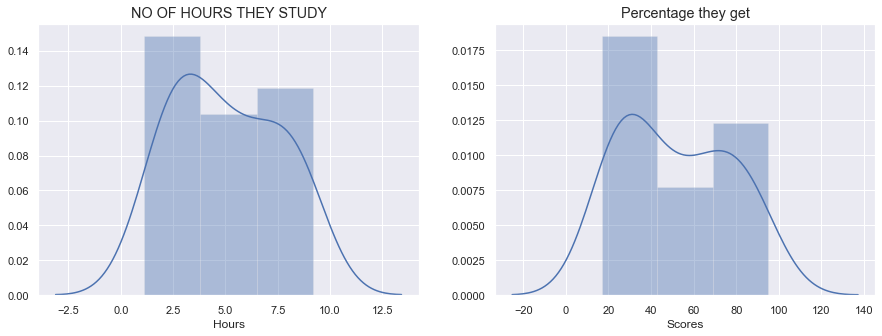

In [64]:
# lets see if our data is normally distributed
fig,axes=plt.subplots(1,2,figsize=(15,5))
plt.style.use('ggplot')

sns.distplot(df['Hours'],ax=axes[0])
axes[0].set_title('NO OF HOURS THEY STUDY')

sns.distplot(df['Scores'],ax=axes[1])
axes[1].set_title('Percentage they get')

As we can see from the above graph that no of hours of study and percentage are highly correlated to each other.lets check the correlation of them.


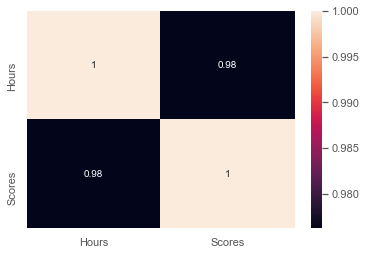

In [65]:
# to check corr
sns.heatmap(df.corr(),annot=True)
#as we can see that they are correlated upto 97 prcnt so our data have linear relationships.

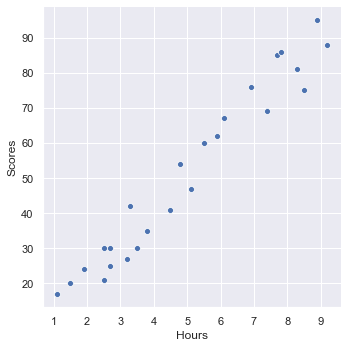

In [66]:
# lets look at scatter plot of it.
sns.set(style='darkgrid')
sns.relplot(x="Hours", y="Scores",
            sizes=(40, 400), data=df)

AS we can see clearly that our data have linear relationship. now we will move to nextr step model creation.


### MODEL CREATION:


In [67]:
X=df[['Hours']] # independent variable
Y=df[['Scores']] # dependent variable

In [68]:
# before moving ahead lets split our dataset into train test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [69]:
#model training
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
print('coffecient and intercept',model.coef_,model.intercept_)

coffecient and intercept [[9.68207815]] [2.82689235]


In [100]:
# lest check for the accuracy of our model
pred=model.predict(X_test)
print('MAE of model is:',mean_absolute_error(Y_test,pred))
print('r2-score score of model is:',r2_score(Y_test,pred))


MAE of model is: 3.9207511902099244
r2-score score of model is: 0.9678055545167994


### lets look it through graph

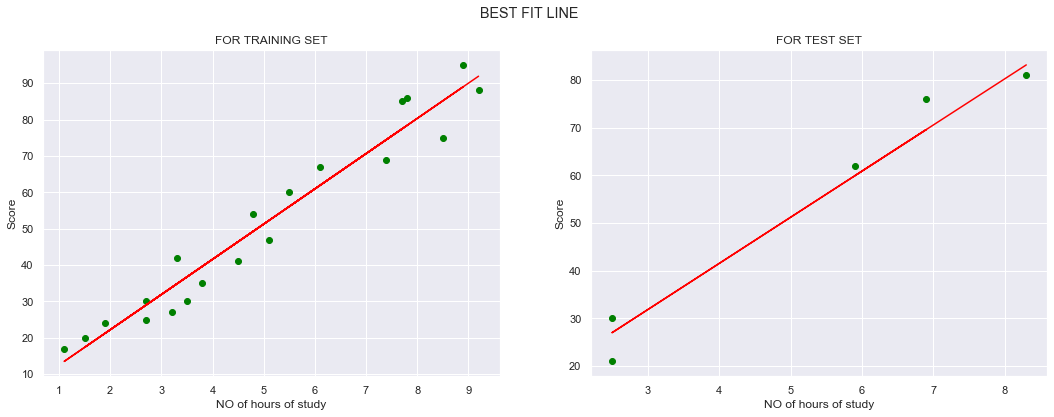

In [99]:
# we will look for best fit line of train data
fig,ax=plt.subplots(1,2,figsize=(18,6))
plt.suptitle('BEST FIT LINE')

#for training data
ax[0].scatter(X_train, Y_train,color='green')
ax[0].plot(X_train,model.predict(X_train),color='red')

ax[0].set_title('FOR TRAINING SET')
ax[0].set_xlabel('NO of hours of study')
ax[0].set_ylabel('Score')

#for testing data
ax[1].scatter(X_test, Y_test,color='green')
ax[1].plot(X_test,model.predict(X_test),color='red')

ax[1].set_title('FOR TEST SET')
ax[1].set_xlabel('NO of hours of study')
ax[1].set_ylabel('Score')


plt.show()

### NOW lets predict how much percentage a person can get after study for 9.25 hours.

In [108]:
# predicting for 9.25 hours
ans=model.predict([[9.25]])
print('student would get approx',ans[0])

student would get approx [92.38611528]


## CONCLUSION
AS we can see that our data has a linear relationship with each other on increasing the no of hours percentage of marks also increase. the formula for linear regression is Y= mX + C here m is slope(coef) and C is intercept. so our equation will likely to be **Y(percentage)= coef * (no of hours study) + intercept** which is equal to **Y= 9.68*(x) + 2.18**. putting the value of X we can calculate the percentage of student.